# 10_ImageAlignement_Testing
In diesem Jupyter Notebook werden Statistiken und Visualisierungen aus Daten RMSE-Werten der Metashape-Reports generiert.

Die Daten basieren auf Bildern der DJI Mini 3 Pro 26.03.2025.

*Der folgende Code wurde mithilfe von ChatGPT (OpenAI) erstellt und/oder bearbeitet.*

### Import der Libraries

In [2]:
import pandas as pd
import glob
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import laspy
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import re
import traceback

### Definition der Grundlagedaten

In [3]:
# CSV-Verzeichnis
csv_dir = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\10_ImageAlignement_Testing\\100_BaseData\\CSV"
print("Daten in CSV-Verzeichnis:", os.listdir(csv_dir))

# # PointCloud-Verzeichnis auf HDD
# pc_hdd_dir = "F:\\530_PointClouds_UAV"
# print("Daten in PointCloud-Verzeichnis (HDD):", os.listdir(pc_hdd_dir))

# PointCloud-Verzeichnis 
pc_dir = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\10_ImageAlignement_Testing\\100_BaseData\\PointCloud"
print("Daten in PointCloud-Verzeichnis:", os.listdir(pc_dir))


Daten in CSV-Verzeichnis: ['10_ImageAlignement_Testing.csv']
Daten in PointCloud-Verzeichnis: ['01_Generic_Preselection_source_guided_matching_NO_clipped.las', '02_Generic_Preselection_estimated_guided_matching_NO_clipped.las', '03_Generic_Preselection_source_guided_matching_YES_clipped.las', '04_Generic_Preselection_estimated_guided_matching_YES_clipped.las', 'pc_tree', 'pc_tree_cleaned']


## 1. Analyse Report Data aus Metashape
Für die folgenden Unterkapitel werden Metadaten aus Metashape verwendet. Diese Metadaten bestehen aus Berechnungsparametern oder berechneten Anzahl Punkten oder Filtering Tresholds. Im Kapitel 1.2 und Kapitel 1.3 werden vorallem die Root Mean Square Error-Werte (RSME-Werte) für die Visualisierungen verwendet.

### 1.1 Import der CSV-Daten
Prüfung des CSV-Imports

In [4]:
# Laden des CSV Files
csv_path = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\10_ImageAlignement_Testing\\100_BaseData\\CSV\\10_ImageAlignement_Testing.csv"

# Alle CSVs einlesen und in einer Liste speichern
csv_file = pd.read_csv(csv_path)

# Vorschaue
display(HTML(csv_file.head(4).to_html(max_cols=200, notebook=True)))

,AlignementMethod_ID,Datum,Drohnenpilot,Anzahl Ringe,Nadir ? [J/N],Anzahl Bilder,Format [H/Q],Windböhen ? [J/N],Accuracy,Generic Preselection,Key Point Limit,Key Point Limit per Mpx,Tie Point Limit,Excl. Stationary tie pts.,guided img matching,adaptive model fitting,Start Tie Points,Automatic Filtering,Manual Filtering,Reprojection error,Reconstruction \r\nuncertainty,Image count,Projection accuracy,Anzahl Control Points,Control Points X error [mm],Control Points Y error [mm],Control Points Z error [mm],Control Points XY error [mm],Control Points Total RMSE [mm],Control Points Total RMSE [pix],Anzahl Check Points,Check Points X error [mm],Check Points Y error [mm],Check Points Z error [mm],Check Points XY error [mm],Check Points Total RMSE [mm],Check Points Total RMSE [pix]
0,Generic_Preselection_source_guided_matching_NO,45735,namp,7,J,444,H,N,Highest,source,60K,-,-,J,N,J,862 K,621 K,497 K,-,53.2795,-,9.01270,7,4.52395,2.56706,4.03574,5.20153,6.58355,1.686,4,2.85367,11.9021,17.6382,12.2394,21.4688,2.279
1,Generic_Preselection_estimated_guided_matching_NO,45735,namp,7,J,444,H,N,Highest,estimated,60K,-,-,J,N,J,860 K,615 K,492 K,-,53.6156,-,7.91818,7,4.58005,2.86133,4.27948,5.40038,6.89043,1.688,4,2.81438,11.4144,17.9095,11.7563,21.4234,2.247
2,Generic_Preselection_source_guided_matching_YES,45735,namp,7,J,444,H,N,Highest,source,-,3000,-,J,J,J,3626 K,1833 K,1466 K,-,54.8820,-,9.73065,4,4.81475,2.86523,4.03020,5.60280,6.90173,1.674,4,2.25431,11.8677,18.4711,12.0799,22.0705,2.471
3,Generic_Preselection_estimated_guided_matching...,45735,namp,7,J,444,H,N,Highest,estimated,-,3000,-,J,J,J,3712 K,1771 K,1416 K,-,55.5361,-,9.29141,4,4.59694,2.96793,4.15404,5.47179,6.86997,1.662,4,1.99183,11.0282,18.4178,11.2066,21.5594,2.412


### 1.2 Vergleich Root Mean Square Error (RMSE) pro UAV-Modell
Beschreibung der Visualisierung!

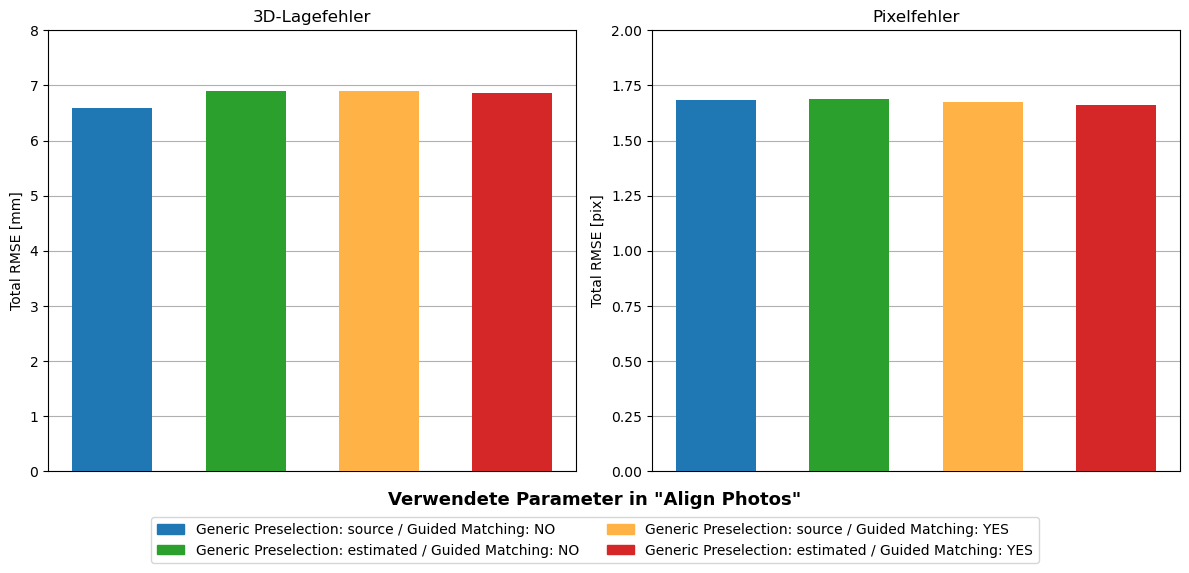

In [18]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Setze AlignementMethod_ID als kategoriale Variable
csv_file["AlignementMethod_ID"] = pd.Categorical(
    csv_file["AlignementMethod_ID"],
    categories=[
        "Generic_Preselection_source_guided_matching_NO",
        "Generic_Preselection_estimated_guided_matching_NO",
        "Generic_Preselection_source_guided_matching_YES",
        "Generic_Preselection_estimated_guided_matching_YES"
    ],
    ordered=True
)

# Definition der Attribute
attributes = [
    ("Control Points Total RMSE [mm]", "3D-Lagefehler", "Total RMSE [mm]", (0, 8)),
    ("Control Points Total RMSE [pix]", "Pixelfehler", "Total RMSE [pix]", (0, 2)),
]

#Legendentitelzuweisung
legenden_namen = {
    "Generic_Preselection_source_guided_matching_NO": "Generic Preselection: source / Guided Matching: NO",
    "Generic_Preselection_estimated_guided_matching_NO": "Generic Preselection: estimated / Guided Matching: NO",
    "Generic_Preselection_source_guided_matching_YES": "Generic Preselection: source / Guided Matching: YES",
    "Generic_Preselection_estimated_guided_matching_YES": "Generic Preselection: estimated / Guided Matching: YES"
}
# Farbzuweisung
aufnahme_colors = {
    "Generic_Preselection_source_guided_matching_NO": "#1f77b4",      # Blau
    "Generic_Preselection_estimated_guided_matching_NO": "#2ca02c",   # Grün
    "Generic_Preselection_source_guided_matching_YES": "#FFB347",     # Orange
    "Generic_Preselection_estimated_guided_matching_YES": "#d62728",  # Rot
}

# Subplots erstellen
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Balkendiagramme pro Attribut zeichnen
for ax, (attr, title, ylabel, ylim) in zip(axes, attributes):
    for AlignementMethod_ID in csv_file["AlignementMethod_ID"].cat.categories:
        filtered = csv_file[csv_file["AlignementMethod_ID"] == AlignementMethod_ID]
        if not filtered.empty:
            value = filtered[attr].values[0]
            ax.bar(AlignementMethod_ID, value, color=aufnahme_colors[AlignementMethod_ID], width=0.6, zorder=100)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_ylim(ylim)
    ax.set_xticks([])
    ax.grid(True, axis="y")
    

# Legende erstellen
legend_handles = [
    Patch(color=aufnahme_colors[key], label=legenden_namen[key])
    for key in aufnahme_colors
]
fig.subplots_adjust(bottom=0.2)  # Platz unten schaffen
fig.text(0.5, -0.02, 'Verwendete Parameter in "Align Photos"', ha='center', fontsize=13, weight='bold'

)
fig.legend(
    handles=legend_handles,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=2
)

plt.tight_layout()
plt.show()


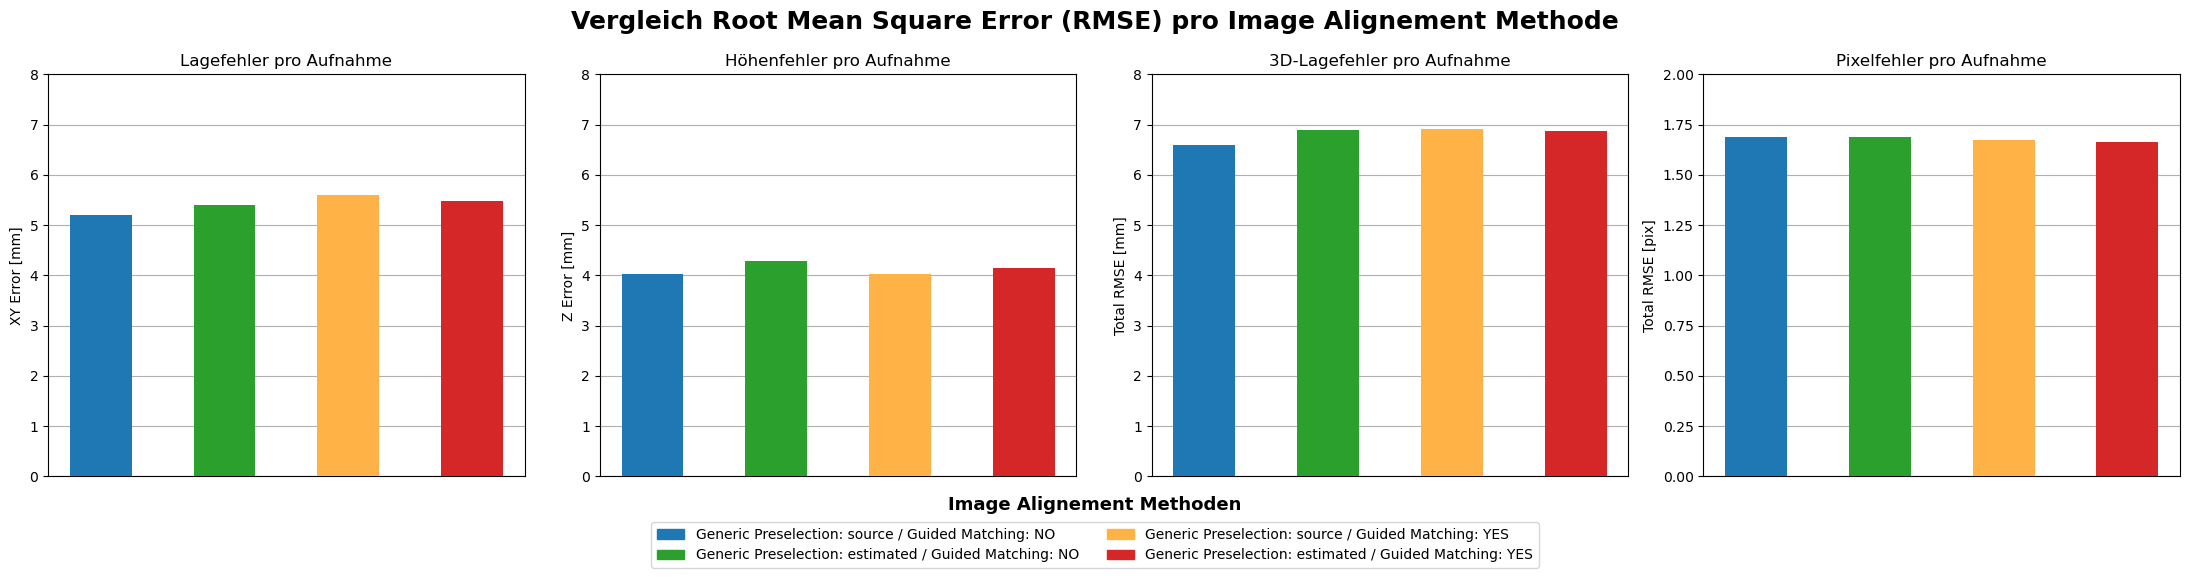

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Setze AlignementMethod_ID als kategoriale Variable
csv_file["AlignementMethod_ID"] = pd.Categorical(
    csv_file["AlignementMethod_ID"],
    categories=[
        "Generic_Preselection_source_guided_matching_NO",
        "Generic_Preselection_estimated_guided_matching_NO",
        "Generic_Preselection_source_guided_matching_YES",
        "Generic_Preselection_estimated_guided_matching_YES"
    ],
    ordered=True
)

# Definition der Attribute
attributes = [
    ("Control Points XY error [mm]", "Lagefehler pro Aufnahme", "XY Error [mm]", (0, 8)),
    ("Control Points Z error [mm]", "Höhenfehler pro Aufnahme", "Z Error [mm]", (0, 8)),
    ("Control Points Total RMSE [mm]", "3D-Lagefehler pro Aufnahme", "Total RMSE [mm]", (0, 8)),
    ("Control Points Total RMSE [pix]", "Pixelfehler pro Aufnahme", "Total RMSE [pix]", (0, 2)),
]

#Legendentitelzuweisung
legenden_namen = {
    "Generic_Preselection_source_guided_matching_NO": "Generic Preselection: source / Guided Matching: NO",
    "Generic_Preselection_estimated_guided_matching_NO": "Generic Preselection: estimated / Guided Matching: NO",
    "Generic_Preselection_source_guided_matching_YES": "Generic Preselection: source / Guided Matching: YES",
    "Generic_Preselection_estimated_guided_matching_YES": "Generic Preselection: estimated / Guided Matching: YES"
}
# Farbzuweisung
aufnahme_colors = {
    "Generic_Preselection_source_guided_matching_NO": "#1f77b4",      # Blau
    "Generic_Preselection_estimated_guided_matching_NO": "#2ca02c",   # Grün
    "Generic_Preselection_source_guided_matching_YES": "#FFB347",     # Orange
    "Generic_Preselection_estimated_guided_matching_YES": "#d62728",  # Rot
}

# Subplots erstellen
fig, axes = plt.subplots(1, 4, figsize=(22, 5))


# Balkendiagramme pro Attribut zeichnen
for ax, (attr, title, ylabel, ylim) in zip(axes, attributes):
    for AlignementMethod_ID in csv_file["AlignementMethod_ID"].cat.categories:
        filtered = csv_file[csv_file["AlignementMethod_ID"] == AlignementMethod_ID]
        if not filtered.empty:
            value = filtered[attr].values[0]
            ax.bar(AlignementMethod_ID, value, color=aufnahme_colors[AlignementMethod_ID], width=0.5, zorder=100)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_ylim(ylim)
    ax.set_xticks([])
    ax.grid(True, axis="y")
    

# Legende erstellen
legend_handles = [
    Patch(color=aufnahme_colors[key], label=legenden_namen[key])
    for key in aufnahme_colors
]
fig.subplots_adjust(bottom=0.2)  # Platz unten schaffen
fig.text(0.5, -0.02, "Image Alignement Methoden", ha='center', fontsize=13, weight='bold'

)
fig.legend(
    handles=legend_handles,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=2
)



# Gesamttitel
fig.suptitle("Vergleich Root Mean Square Error (RMSE) pro Image Alignement Methode", fontsize=18, fontweight="bold")


plt.tight_layout()
plt.show()


### 1.3 Vergleich Root Mean Square Error (RMSE) pro Tie Point Filtering (TPF) Kategorie - Detailansicht Total Error

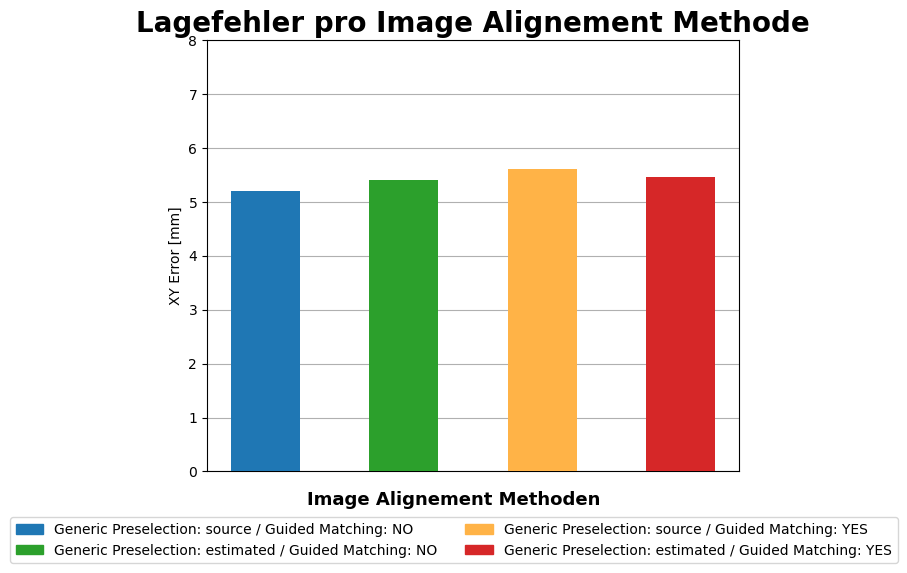

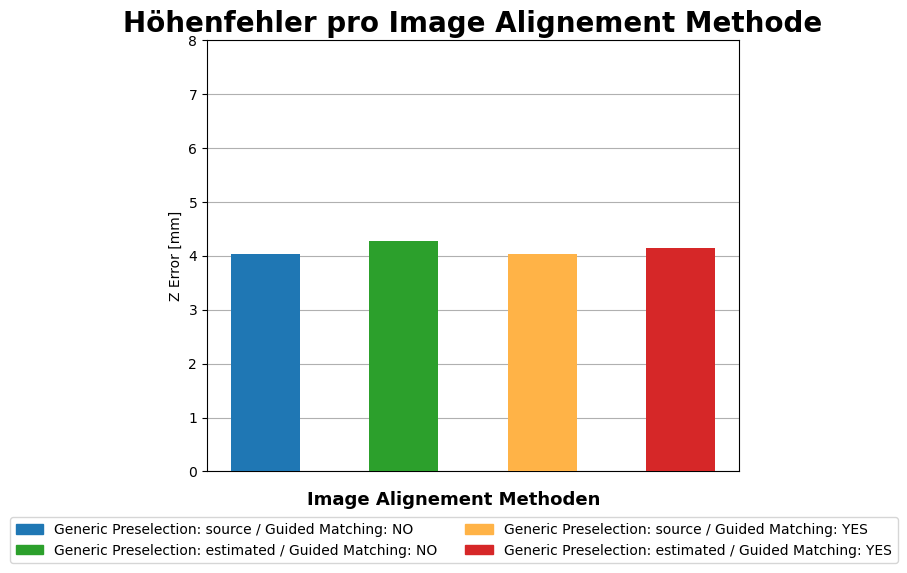

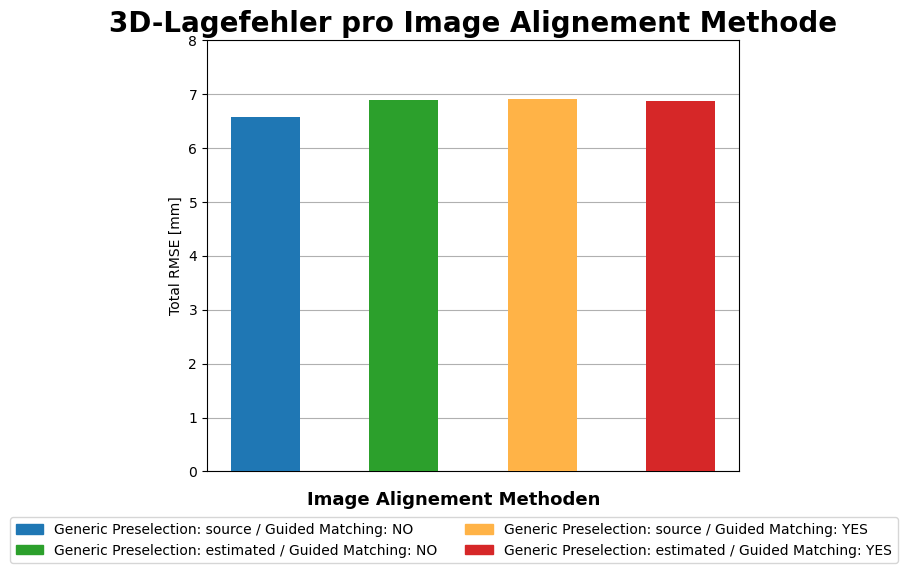

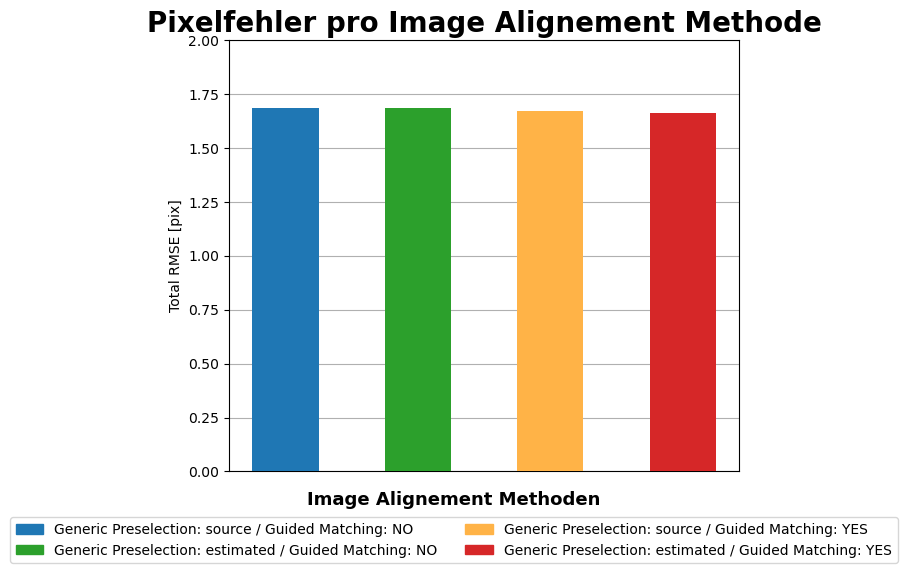

In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Setze AlignementMethod_ID als kategoriale Variable
csv_file["AlignementMethod_ID"] = pd.Categorical(
    csv_file["AlignementMethod_ID"],
    categories=[
        "Generic_Preselection_source_guided_matching_NO",
        "Generic_Preselection_estimated_guided_matching_NO",
        "Generic_Preselection_source_guided_matching_YES",
        "Generic_Preselection_estimated_guided_matching_YES"
    ],
    ordered=True
)

# Definition der Attribute
attributes = [
    ("Control Points XY error [mm]", "Lagefehler pro Image Alignement Methode", "XY Error [mm]", (0, 8)),
    ("Control Points Z error [mm]", "Höhenfehler pro Image Alignement Methode", "Z Error [mm]", (0, 8)),
    ("Control Points Total RMSE [mm]", "3D-Lagefehler pro Image Alignement Methode", "Total RMSE [mm]", (0, 8)),
    ("Control Points Total RMSE [pix]", "Pixelfehler pro Image Alignement Methode", "Total RMSE [pix]", (0, 2)),
]

#Legendentitelzuweisung
legenden_namen = {
    "Generic_Preselection_source_guided_matching_NO": "Generic Preselection: source / Guided Matching: NO",
    "Generic_Preselection_estimated_guided_matching_NO": "Generic Preselection: estimated / Guided Matching: NO",
    "Generic_Preselection_source_guided_matching_YES": "Generic Preselection: source / Guided Matching: YES",
    "Generic_Preselection_estimated_guided_matching_YES": "Generic Preselection: estimated / Guided Matching: YES"
}
# Farbzuweisung
aufnahme_colors = {
    "Generic_Preselection_source_guided_matching_NO": "#1f77b4",      # Blau
    "Generic_Preselection_estimated_guided_matching_NO": "#2ca02c",   # Grün
    "Generic_Preselection_source_guided_matching_YES": "#FFB347",     # Orange
    "Generic_Preselection_estimated_guided_matching_YES": "#d62728",  # Rot
}

# Erstelle für jedes Attribut einen eigenen Detailplot
for attr, title, ylabel, ylim in attributes:
    fig, ax = plt.subplots(figsize=(6, 5))
    
    # Für jede UAV-ID wird ein Balken gezeichnet
    for AlignementMethod_ID in csv_file["AlignementMethod_ID"].cat.categories:
        # Extrahiere den Wert für das jeweilige Attribut
        value = csv_file[csv_file["AlignementMethod_ID"] == AlignementMethod_ID][attr].values[0]
        ax.bar(AlignementMethod_ID, value, color=aufnahme_colors[AlignementMethod_ID], width=0.5, zorder=100)
    
    ax.set_title(title, fontsize=20, fontweight="bold")
    ax.set_ylabel(ylabel)
    ax.set_ylim(ylim)
    ax.set_xticks([])
    ax.grid(True, axis="y")

    # Legende erstellen
    legend_handles = [
        Patch(color=aufnahme_colors[key], label=legenden_namen[key])
        for key in aufnahme_colors
    ]
    fig.subplots_adjust(bottom=0.2)  # Platz unten schaffen
    fig.text(0.5, -0.02, "Image Alignement Methoden", ha='center', fontsize=13, weight='bold'

    )
    fig.legend(
        handles=legend_handles,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.15),
        ncol=2
    )


    plt.tight_layout()
plt.show()